#Download this for datasets

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

# Imports Tools

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch.utils.data import DataLoader
from datasets import Dataset
from datasets import load_dataset, concatenate_datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset

DATASET1

In [ ]:
# Load the first dataset
dataset_dict = load_dataset('Kanakmi/mental-disorders')
print(dataset_dict)

# Combine all splits into one dataset
f_dataset = concatenate_datasets([dataset_dict['train'], dataset_dict['test'], dataset_dict['val']])
print(f_dataset)

# Convert to pandas DataFrame
Dataset1_df = f_dataset.to_pandas()
print(Dataset1_df.head(30))

# Count label distribution
label_counts = Dataset1_df['label'].value_counts()
print(label_counts)

# Dataset1_df exploration
print(Dataset1_df.shape)
print(Dataset1_df.info())
print(Dataset1_df.isnull().sum())

# Drop null values
Dataset1_df = Dataset1_df.dropna()

# Check and drop duplicates
num_duplicates = Dataset1_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
Dataset1_df = Dataset1_df.drop_duplicates()
print(Dataset1_df.shape)

# Map numerical labels to disorder names
label_mapping = {
    0: 'Borderline personality disorder',
    1: 'Anxiety',
    2: 'Depression',
    3: 'Bipolar',
    4: 'Mentalillness',
    5: 'Schizophrenia'
}
Dataset1_df['Disorders'] = Dataset1_df['label'].map(label_mapping)
print(Dataset1_df)

# Drop the 'label' column
Dataset1_df = Dataset1_df.drop('label', axis=1)
print(Dataset1_df.head())



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/120 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/924 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/261M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/13.2M [00:00<?, ?B/s]

val-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/465051 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/23190 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/92976 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 465051
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 23190
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 92976
    })
})
Dataset({
    features: ['text', 'label'],
    num_rows: 581217
})
                                                 text  label
0   My father - all of my life - has shifted betwe...      0
1   I have health anxiety where I go to the doctor...      3
2   I was thinking about the differences between B...      0
3   Let me preface this by saying that I promise I...      2
4   I've been exploring this forum for awhile, and...      0
5   so tired of working so hard, Im already black ...      2
6   I just need help getting through right now and...      2
7   It's been a year now, well over a year actuall...      2
8   it literally makes me so guilty that i can’t s...      0
9   It's really tiring,,\n\nSomeone is an

<ipython-input-4-7ec8e01c143f>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1_df['Disorders'] = Dataset1_df['label'].map(label_mapping)


DATASET2

In [ ]:
# Load the second dataset
dataset_dict = load_dataset("btwitssayan/sentiment-analysis-for-mental-health")
print(dataset_dict)

# Convert to pandas DataFrame
Dataset2_df = dataset_dict['train'].to_pandas()
print(Dataset2_df.head(30))

# Count label distribution
label_counts = Dataset2_df['status'].value_counts()
print(label_counts)

# Dataset2_df exploration
print(Dataset2_df.shape)
print(Dataset2_df.info())
print(Dataset2_df.isnull().sum())

# Drop null values
Dataset2_df = Dataset2_df.dropna()

# Check and drop duplicates
num_duplicates = Dataset2_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
Dataset2_df = Dataset2_df.drop_duplicates()
print(Dataset2_df.shape)

# Drop the 'Unnamed: 0' column
Dataset2_df = Dataset2_df.drop('Unnamed: 0', axis=1)
print(Dataset2_df.head())

# Rename columns
Dataset2_df = Dataset2_df.rename(columns={'statement': 'text', 'status': 'Disorders'})
print(Dataset2_df.head())



data.csv:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/52681 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'statement', 'status'],
        num_rows: 52681
    })
})
    Unnamed: 0                                          statement   status
0            0                                         oh my gosh  Anxiety
1            1  trouble sleeping, confused mind, restless hear...  Anxiety
2            2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3            3  I've shifted my focus to something else but I'...  Anxiety
4            4  I'm restless and restless, it's been a month n...  Anxiety
5            5  every break, you must be nervous, like somethi...  Anxiety
6            6  I feel scared, anxious, what can I do? And may...  Anxiety
7            7    Have you ever felt nervous but didn't know why?  Anxiety
8            8  I haven't slept well for 2 days, it's like I'm...  Anxiety
9            9                 I'm really worried, I want to cry.  Anxiety
10          10  always restless every night, even

Combine both datasets

In [ ]:
combined_df = pd.concat([Dataset1_df, Dataset2_df], ignore_index=True)
combined_df = combined_df.sample(frac=1)  # Shuffle the dataset
print(combined_df.head(50))

                                                     text  \
523863  I regret every single thing I do whether it wa...   
274133  So, i was diagnosed with Major Depressive Diso...   
118998  You know the deal, and what ur therapist and e...   
379345  I had a dream about a week ago that I can't st...   
593147  Hi everyone.I have a weird thing about me and ...   
418105  I can go to sleep fine but when i wake up in t...   
523174  i’m extremely anxious, i’ve always been this w...   
45513   The time that we spent apart is slowly breakin...   
145798  To me it seems like an empty, meaningless phra...   
343612  Hi, all. I’ve been on 1.5mg of Vraylar for a m...   
317220  My mother is a 74 year old epileptic and has b...   
560550  I’ve recently been diagnosed with BPD, and I’v...   
441700  I've previously been diagnosed with MDD with a...   
554590  I (23F), once again, pushed away a person who ...   
313671  But then because its a little bitch it cant ho...   
484604  Hey all. I ended

In [ ]:
# Dataset exploration
print(combined_df.shape)
print(combined_df.info())
print(combined_df.isnull().sum())

# Drop null values
combined_df = combined_df.dropna()

# Check and drop duplicates
num_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)


(618534, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 618534 entries, 523863 to 603091
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       618534 non-null  object
 1   Disorders  618534 non-null  object
dtypes: object(2)
memory usage: 14.2+ MB
None
text         0
Disorders    0
dtype: int64
Number of duplicate rows: 1588
(616946, 2)


In [ ]:
# Count label distribution
label_counts = combined_df['Disorders'].value_counts()
print(label_counts)

Disorders
Borderline personality disorder    203786
Bipolar                            161186
Depression                         134624
Anxiety                             38988
Schizophrenia                       36936
Normal                              16040
Mentalillness                       11551
Suicidal                            10644
Stress                               2296
Personality disorder                  895
Name: count, dtype: int64


In [ ]:
combined_df = combined_df.sample(n=10000,).reset_index(drop=True)
combined_df

,text,Disorders
0,‘’’ when I was just a little boy I told my mom...,Borderline personality disorder
1,Hello! Did anyone struggling with anxiety and ...,Bipolar
2,"hi hi, this realization is new to me but i’m h...",Borderline personality disorder
3,I'd been in a state of recovery the past two w...,Bipolar
4,I had the depo shot for the first time at the ...,Stress
...,...,...
9995,Going through an extremely difficult time and ...,Depression
9996,"Hi all, this isn’t my first time posting on he...",Bipolar
9997,Had to type this twice and I’m annoyed and int...,Borderline personality disorder
9998,It plagues my mind every freaking minute I am ...,Borderline personality disorder


# Data prerpocessing

Cleaning

In [ ]:
import re

def clean_statement(statement):
    # Convert to lowercase
    statement = statement.lower()

    # Remove special characters (punctuation, non-alphabetic characters)
    statement = re.sub(r'[^\w\s]', '', statement)

    # Remove numbers (optional)
    statement = re.sub(r'\d+', '', statement)

    cleaned_statement = ' '.join(statement.split())

    return cleaned_statement

# Apply the cleaning function to the 'text' column
combined_df['text'] = combined_df['text'].apply(clean_statement)

combined_df.head()


,text,Disorders
0,when i was just a little boy i told my mom the...,Borderline personality disorder
1,hello did anyone struggling with anxiety and p...,Bipolar
2,hi hi this realization is new to me but im hav...,Borderline personality disorder
3,id been in a state of recovery the past two we...,Bipolar
4,i had the depo shot for the first time at the ...,Stress


2 balance dataset

In [ ]:
combined_df['Disorders'].value_counts()

,count
Disorders,
Borderline personality disorder,3313
Bipolar,2617
Depression,2169
Anxiety,644
Schizophrenia,562
Normal,273
Mentalillness,194
Suicidal,187
Stress,30


#Handling Imbalance Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Create an instance of RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Define features (X) and target (y)
X = combined_df.drop(columns=['Disorders'])
y = combined_df['Disorders']

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the oversampled features and target back into a DataFrame
combined_df = pd.concat([X_resampled, y_resampled], axis=1)

# Check the new class distribution
print(combined_df['Disorders'].value_counts())


Disorders
Borderline personality disorder    3313
Bipolar                            3313
Stress                             3313
Schizophrenia                      3313
Anxiety                            3313
Depression                         3313
Suicidal                           3313
Normal                             3313
Mentalillness                      3313
Personality disorder               3313
Name: count, dtype: int64


In [ ]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33130 entries, 0 to 33129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       33130 non-null  object
 1   Disorders  33130 non-null  object
dtypes: object(2)
memory usage: 517.8+ KB
None


 3 Encoding *Status*

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
combined_df['label'] = label_encoder.fit_transform(combined_df['Disorders'])

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Use the cleaned text and the encoded labels
X = combined_df['text']
y = combined_df['label']

# First split: train (80%) and temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: val (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [ ]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 26504
Validation set size: 3313
Test set size: 3313


# Tokenization

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# Load tokenizer and model (without classification head)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def get_cls_embeddings(texts, max_length=128, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        encodings = tokenizer(batch_texts.tolist(), truncation=True, padding=True, max_length=max_length, return_tensors="tf")
        outputs = bert_model(encodings['input_ids'], attention_mask=encodings['attention_mask'])
        cls_embeddings = outputs.last_hidden_state[:, 0, :]
        embeddings.extend(cls_embeddings.numpy())
    return np.array(embeddings)

X_train_embeddings = get_cls_embeddings(X_train, batch_size=32)  # Adjust batch_size as needed
X_val_embeddings = get_cls_embeddings(X_val, batch_size=32)
X_test_embeddings = get_cls_embeddings(X_test, batch_size=32)

#Model Training and Validation

MLP(Multilayer Perceptron)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(768,)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.3))
mlp_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
mlp_model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mlp = mlp_model.fit(
    X_train_embeddings, y_train,
    validation_data=(X_val_embeddings, y_val),
    epochs=50,
    batch_size=32
)

# Evaluate function
def evaluate_model(model, X_set, y_true, dataset_name):
    y_probs = model.predict(X_set)
    y_preds = np.argmax(y_probs, axis=1)

    acc = accuracy_score(y_true, y_preds)
    report = classification_report(y_true, y_preds, target_names=label_encoder.classes_)

    print(f"\n{dataset_name} Accuracy: {acc * 100:.2f}%")
    print(f"{dataset_name} Classification Report:\n{report}")

# Use for train/val/test
evaluate_model(mlp_model, X_train_embeddings, y_train, "Training")
evaluate_model(mlp_model, X_val_embeddings, y_val, "Validation")
evaluate_model(mlp_model, X_test_embeddings, y_test, "Test")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2327 - loss: 2.1493 - val_accuracy: 0.4980 - val_loss: 1.5425
Epoch 2/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4584 - loss: 1.5932 - val_accuracy: 0.5812 - val_loss: 1.2467
Epoch 3/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5424 - loss: 1.3369 - val_accuracy: 0.6232 - val_loss: 1.0961
Epoch 4/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5797 - loss: 1.2024 - val_accuracy: 0.6485 - val_loss: 1.0105
Epoch 5/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6076 - loss: 1.1059 - val_accuracy: 0.6717 - val_loss: 0.9520
Epoch 6/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6362 - loss: 1.0304 - val_accuracy: 0.6850 - val_loss: 0.8991
Epoch 7/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6433 - loss: 0.9864 - val_accuracy: 0.7003 - val_loss: 0.8470
Epoch 8/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6678 - loss: 0.9279 - val_accuracy: 0.

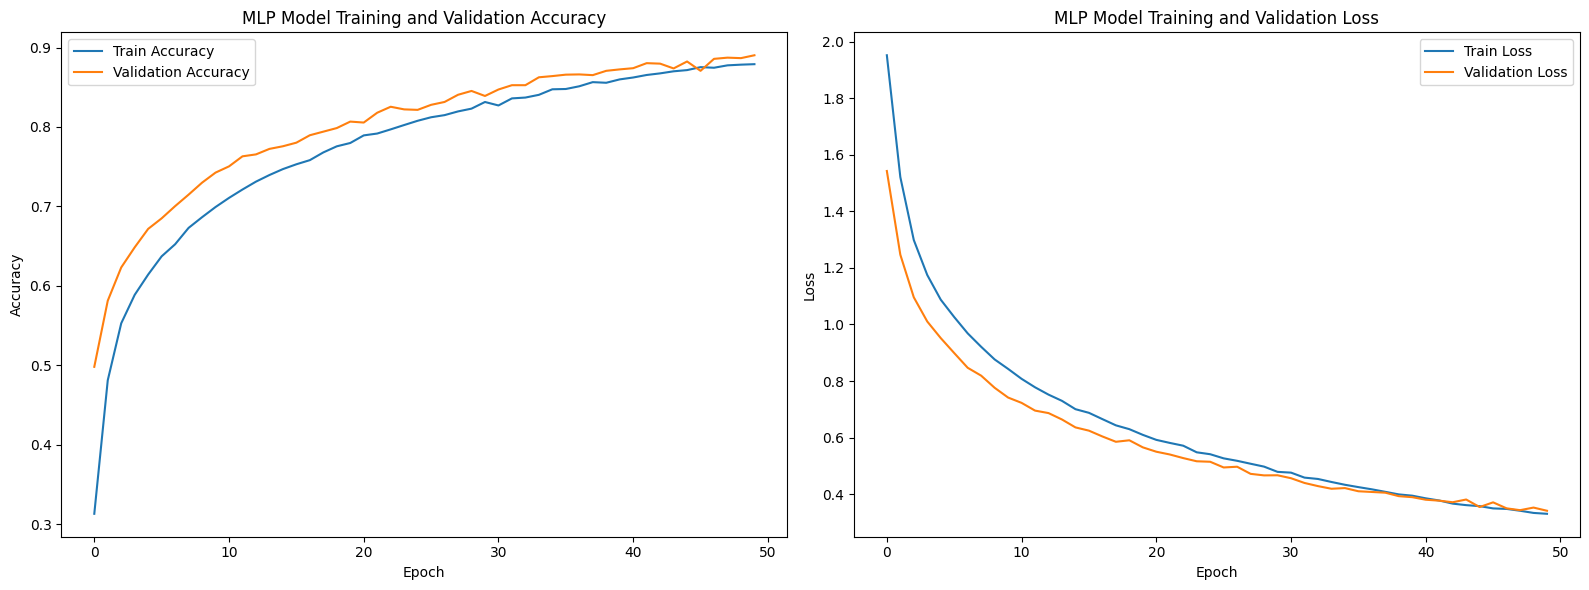

In [ ]:
# Plot Training Logs
history_df = pd.DataFrame(history_mlp.history)
plt.figure(figsize=(16, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title("MLP Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title("MLP Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_pred_labels = np.argmax(mlp_model.predict(X_test_embeddings), axis=1)
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print all metrics
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy:  89.96%
Precision: 89.84%
Recall:    89.96%
F1 Score:  89.80%


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


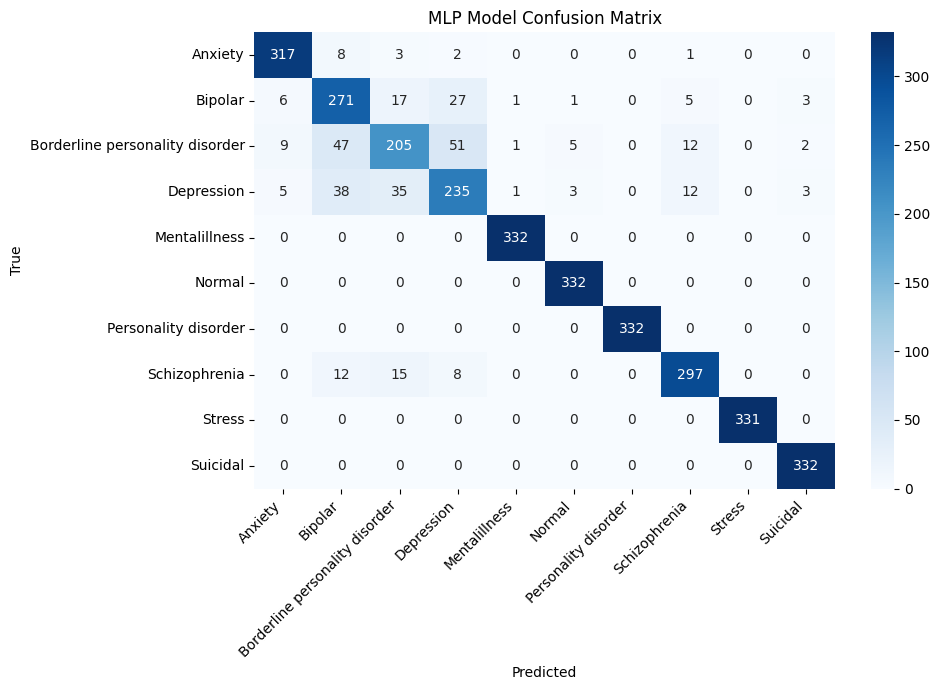

In [ ]:
# Confusion Matrix

y_pred_labels = np.argmax(mlp_model.predict(X_test_embeddings), axis=1)
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Model Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


CNN (Convolutional Neural Network)

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


# Reshape for CNN input (BERT embeddings: 768 → (768, 1))
X_train_reshaped = X_train_embeddings.reshape((-1, 768, 1))
X_val_reshaped = X_val_embeddings.reshape((-1, 768, 1))
X_test_reshaped = X_test_embeddings.reshape((-1, 768, 1))

# Define CNN model
model = Sequential([
    Input(shape=(768, 1)),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=50,
    batch_size=32
)

Epoch 1/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.2130 - loss: 2.1783 - val_accuracy: 0.4275 - val_loss: 1.7771
Epoch 2/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3743 - loss: 1.8277 - val_accuracy: 0.5146 - val_loss: 1.5192
Epoch 3/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4502 - loss: 1.6077 - val_accuracy: 0.5876 - val_loss: 1.3191
Epoch 4/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4915 - loss: 1.4725 - val_accuracy: 0.6054 - val_loss: 1.1993
Epoch 5/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5143 - loss: 1.3815 - val_accuracy: 0.6452 - val_loss: 1.0867
Epoch 6/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5417 - loss: 1.2884 - val_accuracy: 0.6669 - val_loss: 1.0026
Epoch 7/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5670 - loss: 1.2145 - val_accuracy: 0.6750 - val_loss: 0.9633
Epoch 8/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5825 - loss: 1.1660 - val_accuracy:

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.76      0.95      0.84       331
                        Bipolar       0.76      0.62      0.68       331
Borderline personality disorder       0.67      0.58      0.62       332
                     Depression       0.68      0.63      0.66       332
                  Mentalillness       0.99      1.00      0.99       332
                         Normal       0.97      1.00      0.98       332
           Personality disorder       1.00      1.00      1.00       332
                  Schizophrenia       0.77      0.81      0.79       332
                         Stress       1.00      1.00      1.00       331
                       Suicidal       0.97      1.00      0.98       332

                       accuracy                           0.86      3317
                      macro avg       0.86      0.86 

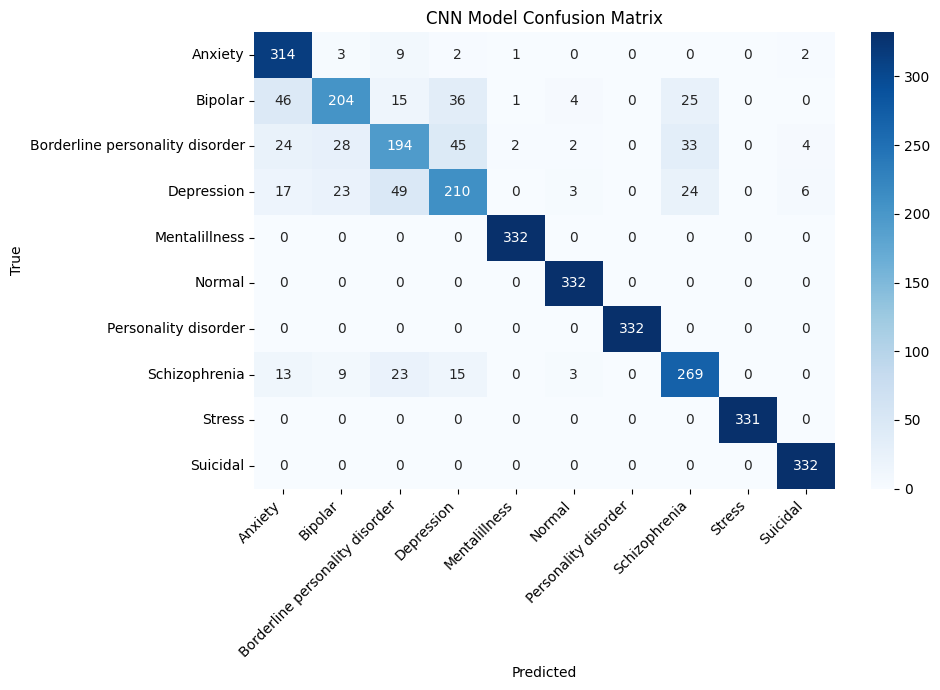

830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Training Accuracy: 89.27%
Training Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.80      0.97      0.88      2654
                        Bipolar       0.86      0.66      0.75      2654
Borderline personality disorder       0.75      0.66      0.70      2654
                     Depression       0.75      0.75      0.75      2653
                  Mentalillness       1.00      1.00      1.00      2653
                         Normal       0.99      1.00      1.00      2654
           Personality disorder       1.00      1.00      1.00      2653
                  Schizophrenia       0.80      0.89      0.84      2654
                         Stress       1.00      1.00      1.00      2654
                       Suicidal       0.99      1.00      0.99      2653

                       accuracy                           0.89     26536
                      

In [ ]:
# Predict on Test Set
y_pred_probs = model.predict(X_test_reshaped)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

print("Test Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Model Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Evaluation Function
def evaluate_model(model, X_set, y_true, dataset_name):
    y_probs = model.predict(X_set)
    y_preds = np.argmax(y_probs, axis=1)

    acc = accuracy_score(y_true, y_preds)
    report = classification_report(y_true, y_preds, target_names=label_encoder.classes_)

    print(f"\n{dataset_name} Accuracy: {acc * 100:.2f}%")
    print(f"{dataset_name} Classification Report:\n{report}")

# Use this to evaluate all sets
evaluate_model(model, X_train_reshaped, y_train, "Training")
evaluate_model(model, X_val_reshaped, y_val, "Validation")
evaluate_model(model, X_test_reshaped, y_test, "Test")


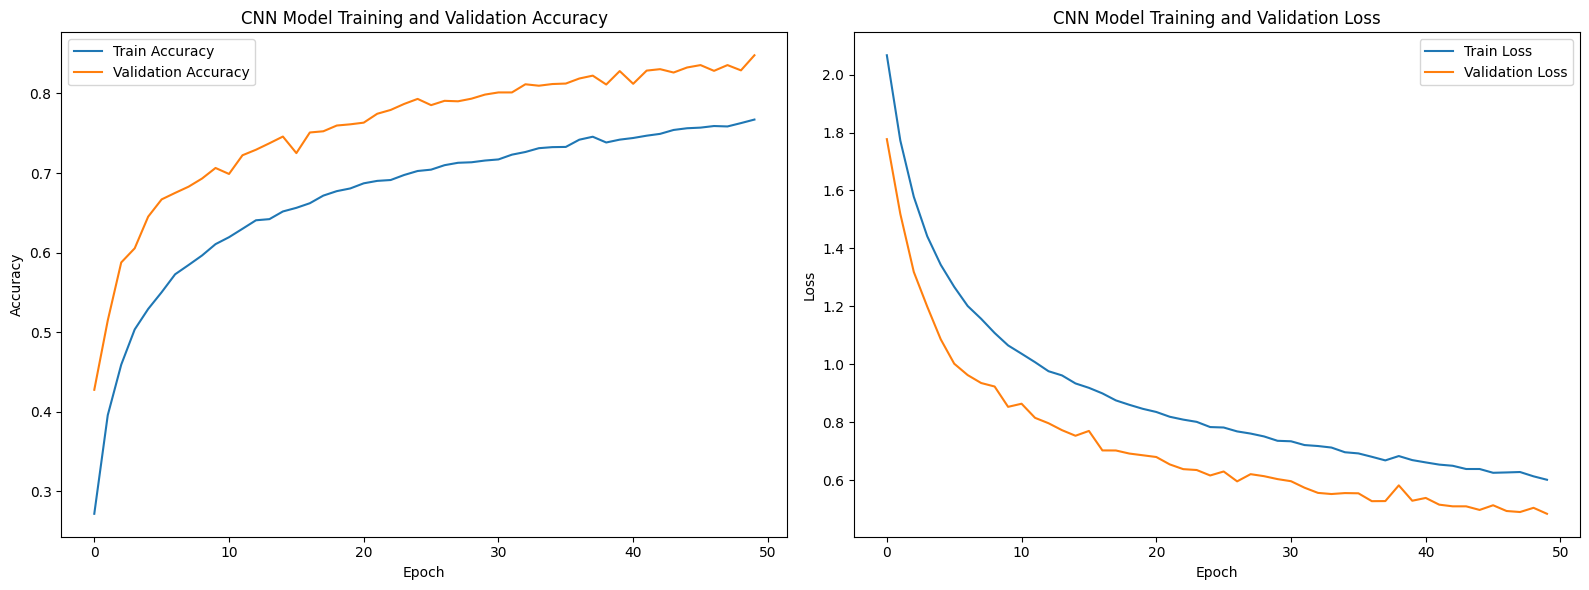

In [ ]:
# Training Log Plots
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(16, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title("CNN Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_pred_labels_cnn = np.argmax(model.predict(X_test_reshaped), axis=1)

accuracy_cnn = accuracy_score(y_test, y_pred_labels_cnn)
precision_cnn = precision_score(y_test, y_pred_labels_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_labels_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_labels_cnn, average='weighted')

print("\n CNN Model Metrics:")
print(f"Accuracy:  {accuracy_cnn * 100:.2f}%")
print(f"Precision: {precision_cnn * 100:.2f}%")
print(f"Recall:    {recall_cnn * 100:.2f}%")
print(f"F1 Score:  {f1_cnn * 100:.2f}%")


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

 CNN Model Metrics:
Accuracy:  85.92%
Precision: 85.58%
Recall:    85.92%
F1 Score:  85.52%


LSTM (Long Short-Term Memory)

In [ ]:
X_train_lstm = X_train_embeddings.reshape((-1, 768, 1))
X_val_lstm = X_val_embeddings.reshape((-1, 768, 1))
X_test_lstm = X_test_embeddings.reshape((-1, 768, 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(768, 1)),
    LSTM(128),                   # One LSTM layer with 128 units
    Dropout(0.5),                # Prevent overfitting
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=32
)



Epoch 1/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.1256 - loss: 2.2932 - val_accuracy: 0.1675 - val_loss: 2.2005
Epoch 2/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.1726 - loss: 2.2056 - val_accuracy: 0.2220 - val_loss: 2.1641
Epoch 3/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.1903 - loss: 2.1766 - val_accuracy: 0.2186 - val_loss: 2.1469
Epoch 4/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.1973 - loss: 2.1618 - val_accuracy: 0.2186 - val_loss: 2.1210
Epoch 5/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.2187 - loss: 2.1385 - val_accuracy: 0.2384 - val_loss: 2.0970
Epoch 6/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.2288 - loss: 2.1215 - val_accuracy: 0.2223 - val_loss: 2.0808
Epoch 7/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.2274 - loss: 2.1062 - val_accuracy: 0.2393 - val_loss: 2.0664
Epoch 8/50
823/823 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.2344 - loss: 2.1007 - 

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Test Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.22      0.11      0.14       329
                        Bipolar       0.25      0.04      0.07       329
Borderline personality disorder       0.20      0.38      0.27       329
                     Depression       0.19      0.05      0.07       329
                  Mentalillness       0.28      0.21      0.24       329
                         Normal       0.52      0.72      0.61       329
           Personality disorder       0.97      1.00      0.99       329
                  Schizophrenia       0.25      0.26      0.26       329
                         Stress       0.61      0.95      0.74       328
                       Suicidal       0.54      0.80      0.64       329

                       accuracy                           0.45      3289
                      macro avg       0.40      0.45

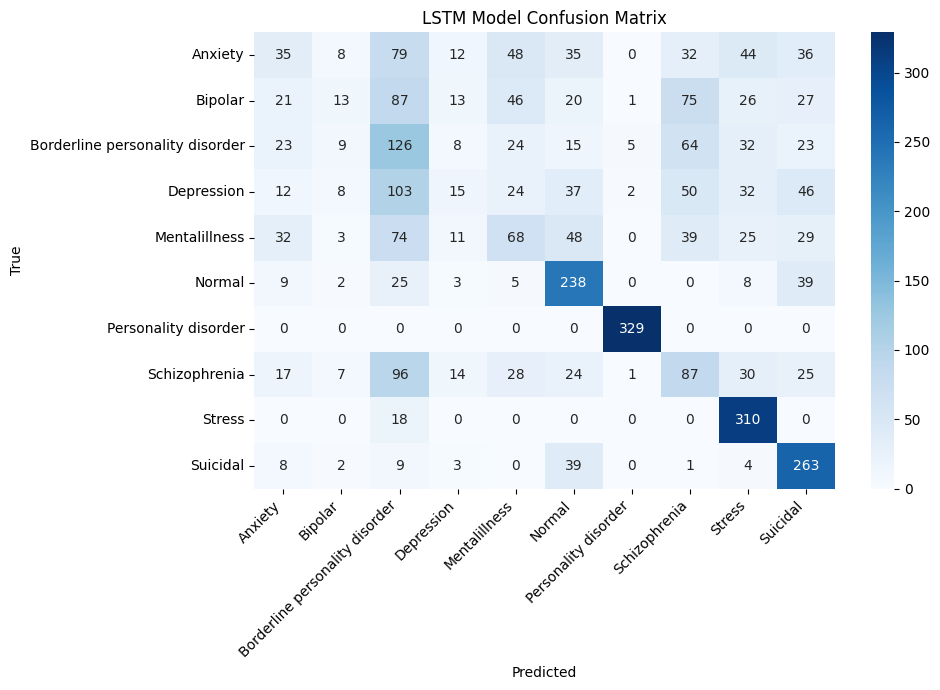

823/823 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step

Training Accuracy: 46.10%
Training Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.22      0.12      0.16      2631
                        Bipolar       0.29      0.05      0.08      2632
Borderline personality disorder       0.22      0.40      0.28      2631
                     Depression       0.20      0.04      0.07      2631
                  Mentalillness       0.29      0.21      0.25      2631
                         Normal       0.56      0.77      0.65      2631
           Personality disorder       0.96      1.00      0.98      2631
                  Schizophrenia       0.24      0.24      0.24      2631
                         Stress       0.61      0.94      0.74      2632
                       Suicidal       0.55      0.82      0.66      2631

                       accuracy                           0.46     26312
                     

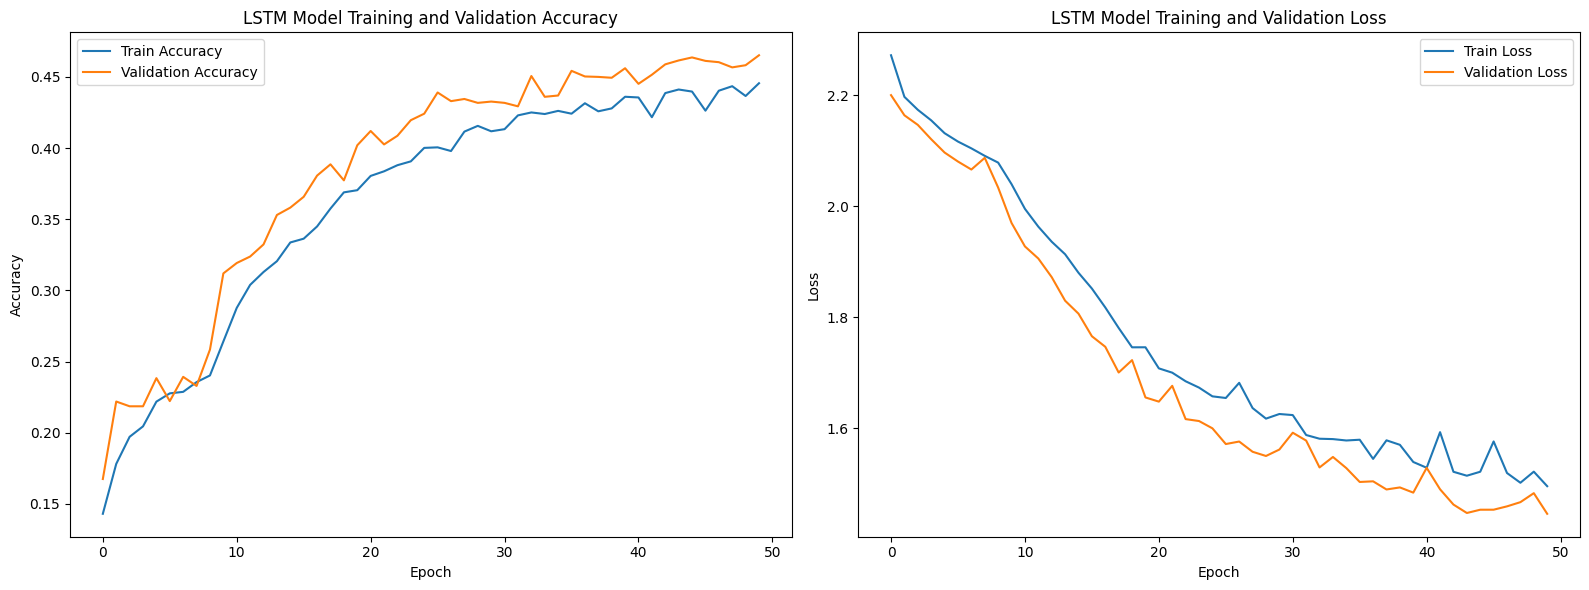

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Predict on Test Set
# Replace X_test_reshaped with X_test_lstm as this is the input for the LSTM model.
y_pred_probs = model.predict(X_test_lstm)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

print("Test Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Model Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. General Evaluation Function
def evaluate_model(model, X_set, y_true, dataset_name):
    y_probs = model.predict(X_set)
    y_preds = np.argmax(y_probs, axis=1)

    acc = accuracy_score(y_true, y_preds)
    report = classification_report(y_true, y_preds, target_names=label_encoder.classes_)

    print(f"\n{dataset_name} Accuracy: {acc * 100:.2f}%")
    print(f"{dataset_name} Classification Report:\n{report}")

# Use this to evaluate all sets
# Replace X_*_reshaped with X_*_lstm
evaluate_model(model, X_train_lstm, y_train, "Training")
evaluate_model(model, X_val_lstm, y_val, "Validation")
evaluate_model(model, X_test_lstm, y_test, "Test")

# 4. Training Log Plots
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(16, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title("LSTM Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Replace X_test_reshaped with X_test_lstm
y_pred_labels_lstm = np.argmax(model.predict(X_test_lstm), axis=1)

accuracy_lstm = accuracy_score(y_test, y_pred_labels_lstm)
precision_lstm = precision_score(y_test, y_pred_labels_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_labels_lstm, average='weighted')
f1_lstm = f1_score(y_test, y_pred_labels_lstm, average='weighted')

print("\n LSTM Model Metrics:")
print(f"Accuracy:  {accuracy_lstm * 100:.2f}%")
print(f"Precision: {precision_lstm * 100:.2f}%")
print(f"Recall:    {recall_lstm * 100:.2f}%")
print(f"F1 Score:  {f1_lstm * 100:.2f}%")

103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step

 LSTM Model Metrics:
Accuracy:  45.12%
Precision: 40.37%
Recall:    45.12%
F1 Score:  40.22%


Bi-LSTM

In [ ]:
X_train_bilstm = X_train_embeddings.reshape((-1, 768, 1))
X_val_bilstm = X_val_embeddings.reshape((-1, 768, 1))
X_test_bilstm = X_test_embeddings.reshape((-1, 768, 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model_bilstm = Sequential([
    Input(shape=(768, 1)),
    Bidirectional(LSTM(128)),           # Bidirectional wrapper
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_bilstm.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(
    X_train_bilstm, y_train,
    validation_data=(X_val_bilstm, y_val),
    epochs=50,
    batch_size=32
)


Epoch 1/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.1494 - loss: 2.2728 - val_accuracy: 0.2593 - val_loss: 2.0828
Epoch 2/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.2327 - loss: 2.1072 - val_accuracy: 0.2378 - val_loss: 2.0719
Epoch 3/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.2472 - loss: 2.0717 - val_accuracy: 0.2675 - val_loss: 2.0391
Epoch 4/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.2538 - loss: 2.0569 - val_accuracy: 0.2868 - val_loss: 2.0126
Epoch 5/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.2617 - loss: 2.0496 - val_accuracy: 0.2823 - val_loss: 2.0133
Epoch 6/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.2649 - loss: 2.0330 - val_accuracy: 0.2790 - val_loss: 1.9723
Epoch 7/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.2746 - loss: 1.9973 - val_accuracy: 0.3074 - val_loss: 1.9138
Epoch 8/50
827/827 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.2890 - loss: 1.9530 - 

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Bi-LSTM Test Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.36      0.32      0.34       330
                        Bipolar       0.28      0.11      0.15       330
Borderline personality disorder       0.28      0.33      0.30       331
                     Depression       0.31      0.18      0.22       331
                  Mentalillness       0.57      0.78      0.66       331
                         Normal       0.70      0.83      0.76       330
           Personality disorder       0.98      1.00      0.99       331
                  Schizophrenia       0.31      0.25      0.28       330
                         Stress       0.93      1.00      0.97       330
                       Suicidal       0.62      0.98      0.76       331

                       accuracy                           0.58      3305
                      macro avg       0.54  

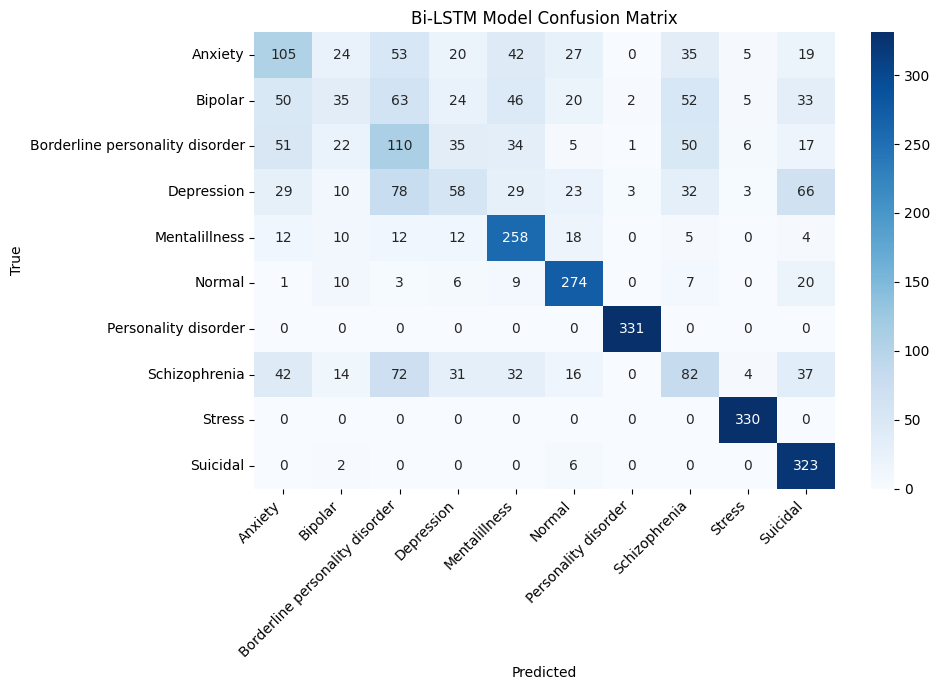

827/827 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step

Training Accuracy: 59.44%
Training Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.39      0.35      0.37      2644
                        Bipolar       0.32      0.13      0.18      2644
Borderline personality disorder       0.31      0.34      0.32      2644
                     Depression       0.32      0.19      0.24      2644
                  Mentalillness       0.60      0.80      0.68      2644
                         Normal       0.73      0.86      0.79      2644
           Personality disorder       0.98      1.00      0.99      2644
                  Schizophrenia       0.35      0.31      0.33      2644
                         Stress       0.93      1.00      0.97      2644
                       Suicidal       0.64      0.97      0.77      2644

                       accuracy                           0.59     26440
                    

In [ ]:
# Predict
y_pred_probs_bilstm = model_bilstm.predict(X_test_bilstm)
y_pred_labels_bilstm = np.argmax(y_pred_probs_bilstm, axis=1)

print("Bi-LSTM Test Classification Report:")
print(classification_report(y_test, y_pred_labels_bilstm, target_names=label_encoder.classes_))

# Confusion Matrix
cm_bilstm = confusion_matrix(y_test, y_pred_labels_bilstm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Bi-LSTM Model Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# General Evaluation Function
def evaluate_model_bilstm(model, X_set, y_true, dataset_name):
    y_probs = model.predict(X_set)
    y_preds = np.argmax(y_probs, axis=1)

    acc = accuracy_score(y_true, y_preds)
    report = classification_report(y_true, y_preds, target_names=label_encoder.classes_)

    print(f"\n{dataset_name} Accuracy: {acc * 100:.2f}%")
    print(f"{dataset_name} Classification Report:\n{report}")

# Evaluate all
evaluate_model_bilstm(model_bilstm, X_train_bilstm, y_train, "Training")
evaluate_model_bilstm(model_bilstm, X_val_bilstm, y_val, "Validation")
evaluate_model_bilstm(model_bilstm, X_test_bilstm, y_test, "Test")


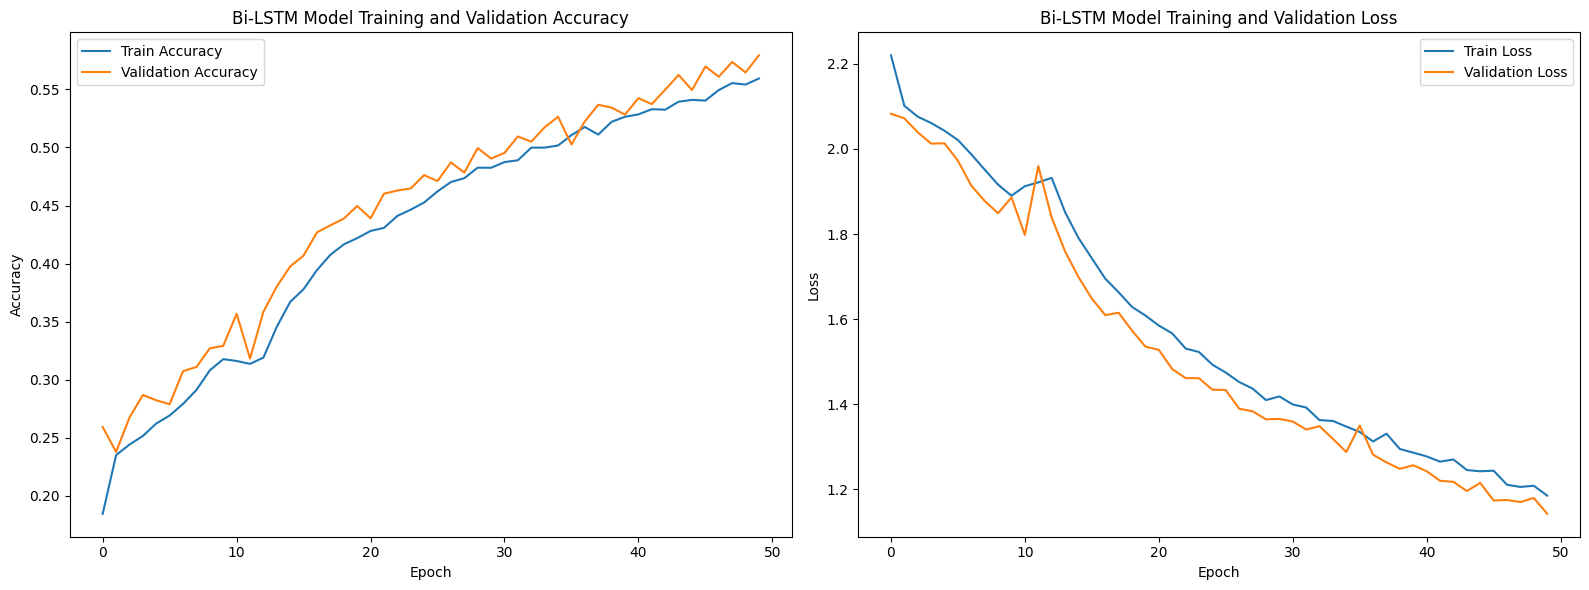

In [ ]:
history_df_bilstm = pd.DataFrame(history_bilstm.history)

plt.figure(figsize=(16, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df_bilstm['accuracy'], label='Train Accuracy')
plt.plot(history_df_bilstm['val_accuracy'], label='Validation Accuracy')
plt.title("Bi-LSTM Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_df_bilstm['loss'], label='Train Loss')
plt.plot(history_df_bilstm['val_loss'], label='Validation Loss')
plt.title("Bi-LSTM Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_pred_labels_bilstm = np.argmax(model_bilstm.predict(X_test_bilstm), axis=1)

accuracy_bilstm = accuracy_score(y_test, y_pred_labels_bilstm)
precision_bilstm = precision_score(y_test, y_pred_labels_bilstm, average='weighted')
recall_bilstm = recall_score(y_test, y_pred_labels_bilstm, average='weighted')
f1_bilstm = f1_score(y_test, y_pred_labels_bilstm, average='weighted')

print("\n Bi-LSTM Model Metrics:")
print(f"Accuracy:  {accuracy_bilstm * 100:.2f}%")
print(f"Precision: {precision_bilstm * 100:.2f}%")
print(f"Recall:    {recall_bilstm * 100:.2f}%")
print(f"F1 Score:  {f1_bilstm * 100:.2f}%")

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

 Bi-LSTM Model Metrics:
Accuracy:  57.67%
Precision: 53.60%
Recall:    57.67%
F1 Score:  54.38%


Ensemble(CNN-MLP)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Define and Train MLP Model
mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(768,)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])
mlp_model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mlp = mlp_model.fit(X_train_embeddings, y_train, validation_data=(X_val_embeddings, y_val), epochs=50, batch_size=32)

# Define and Train CNN Model
X_train_reshaped = X_train_embeddings.reshape((-1, 768, 1))
X_val_reshaped = X_val_embeddings.reshape((-1, 768, 1))
X_test_reshaped = X_test_embeddings.reshape((-1, 768, 1))

cnn_model = Sequential([
    Input(shape=(768, 1)),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])
cnn_model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=50, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2229 - loss: 2.1654 - val_accuracy: 0.4617 - val_loss: 1.6088
Epoch 2/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4337 - loss: 1.6492 - val_accuracy: 0.5530 - val_loss: 1.3441
Epoch 3/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5104 - loss: 1.4309 - val_accuracy: 0.5981 - val_loss: 1.1853
Epoch 4/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5591 - loss: 1.2790 - val_accuracy: 0.6334 - val_loss: 1.0737
Epoch 5/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5949 - loss: 1.1694 - val_accuracy: 0.6585 - val_loss: 0.9870
Epoch 6/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6202 - loss: 1.0822 - val_accuracy: 0.6775 - val_loss: 0.9125
Epoch 7/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6478 - loss: 1.0018 - val_accuracy: 0.6950 - val_loss: 0.8622
Epoch 8/50
816/816 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6642 - loss: 0.9554 - val_accuracy: 0.

NameError: name 'history_ensemble' is not defined

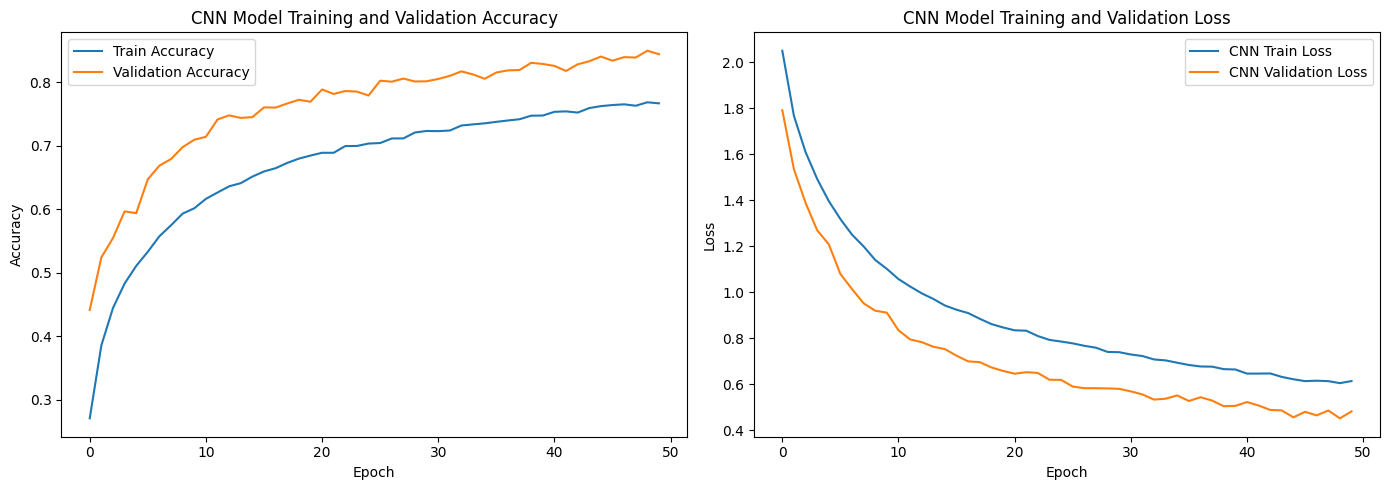

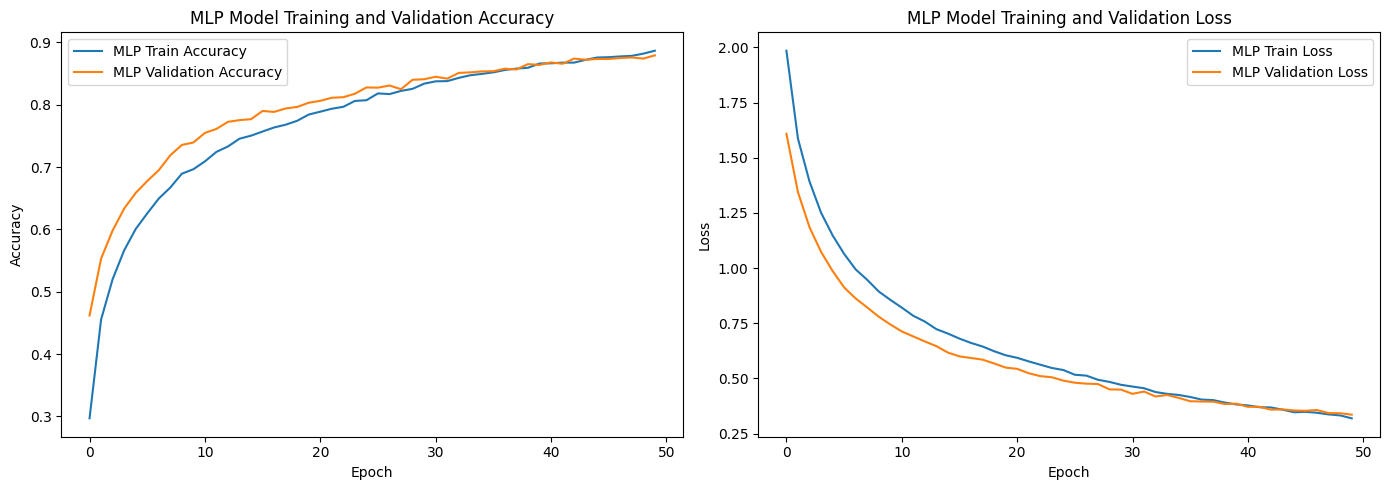

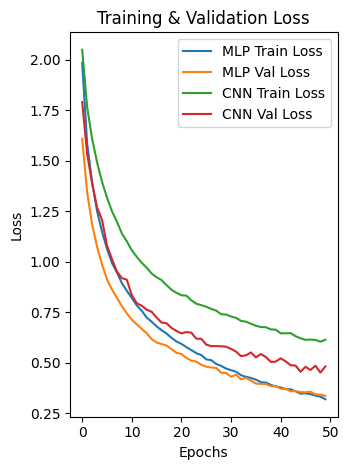

In [ ]:
history_cnn_df = pd.DataFrame(history_cnn.history)
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn_df['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_df['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn_df['loss'], label='CNN Train Loss')
plt.plot(history_cnn_df['val_loss'], label='CNN Validation Loss')
plt.title("CNN Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# MLP Model Training Plot
history_mlp_df = pd.DataFrame(history_mlp.history)
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_mlp_df['accuracy'], label='MLP Train Accuracy')
plt.plot(history_mlp_df['val_accuracy'], label='MLP Validation Accuracy')
plt.title("MLP Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_mlp_df['loss'], label='MLP Train Loss')
plt.plot(history_mlp_df['val_loss'], label='MLP Validation Loss')
plt.title("MLP Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


# Loss
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='MLP Train Loss')
plt.plot(history_mlp.history['val_loss'], label='MLP Val Loss')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
def evaluate_model(model, X, y, dataset_name):
    y_pred = np.argmax(model.predict(X), axis=1)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y, y_pred, average='weighted', zero_division=0)

    print(f"\n--- {dataset_name} Evaluation ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")


In [ ]:
evaluate_model(mlp_model, X_train_embeddings, y_train, "MLP - Training")
evaluate_model(mlp_model, X_val_embeddings, y_val, "MLP - Validation")
evaluate_model(mlp_model, X_test_embeddings, y_test, "MLP - Test")


816/816 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

--- MLP - Training Evaluation ---
Accuracy : 0.9369
Precision: 0.9360
Recall   : 0.9369
F1 Score : 0.9360
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

--- MLP - Validation Evaluation ---
Accuracy : 0.8792
Precision: 0.8734
Recall   : 0.8792
F1 Score : 0.8745
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

--- MLP - Test Evaluation ---
Accuracy : 0.8844
Precision: 0.8793
Recall   : 0.8844
F1 Score : 0.8805


In [ ]:
evaluate_model(cnn_model, X_train_reshaped, y_train, "CNN - Training")
evaluate_model(cnn_model, X_val_reshaped, y_val, "CNN - Validation")
evaluate_model(cnn_model, X_test_reshaped, y_test, "CNN - Test")


816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

--- CNN - Training Evaluation ---
Accuracy : 0.8870
Precision: 0.8865
Recall   : 0.8870
F1 Score : 0.8863
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- CNN - Validation Evaluation ---
Accuracy : 0.8440
Precision: 0.8437
Recall   : 0.8440
F1 Score : 0.8420
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- CNN - Test Evaluation ---
Accuracy : 0.8479
Precision: 0.8466
Recall   : 0.8479
F1 Score : 0.8459


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


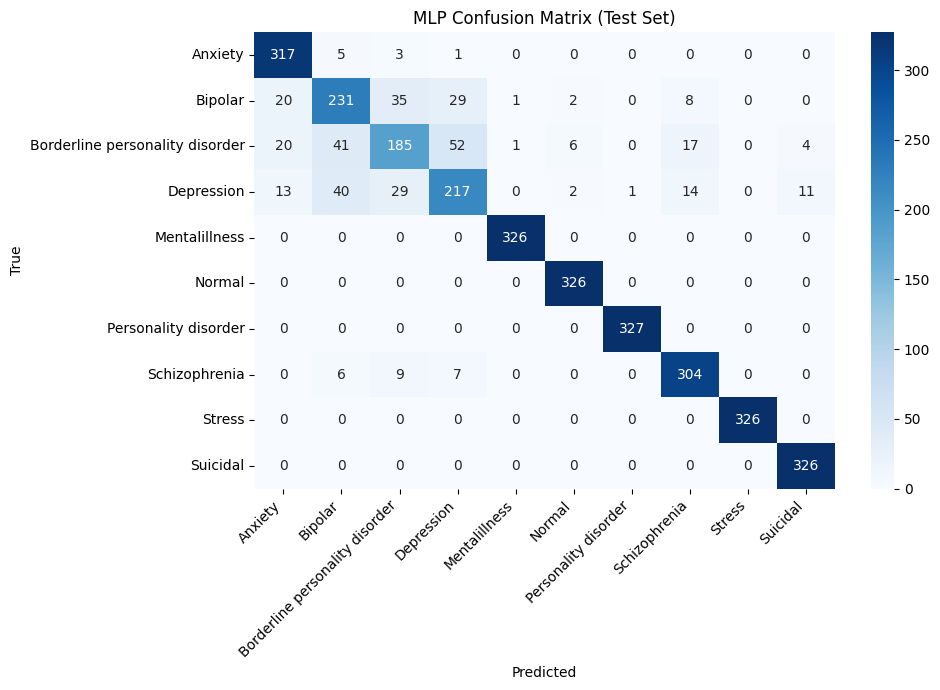

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with MLP model
mlp_test_preds = np.argmax(mlp_model.predict(X_test_embeddings), axis=1)

# Confusion matrix
cm_mlp = confusion_matrix(y_test, mlp_test_preds)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix (Test Set)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


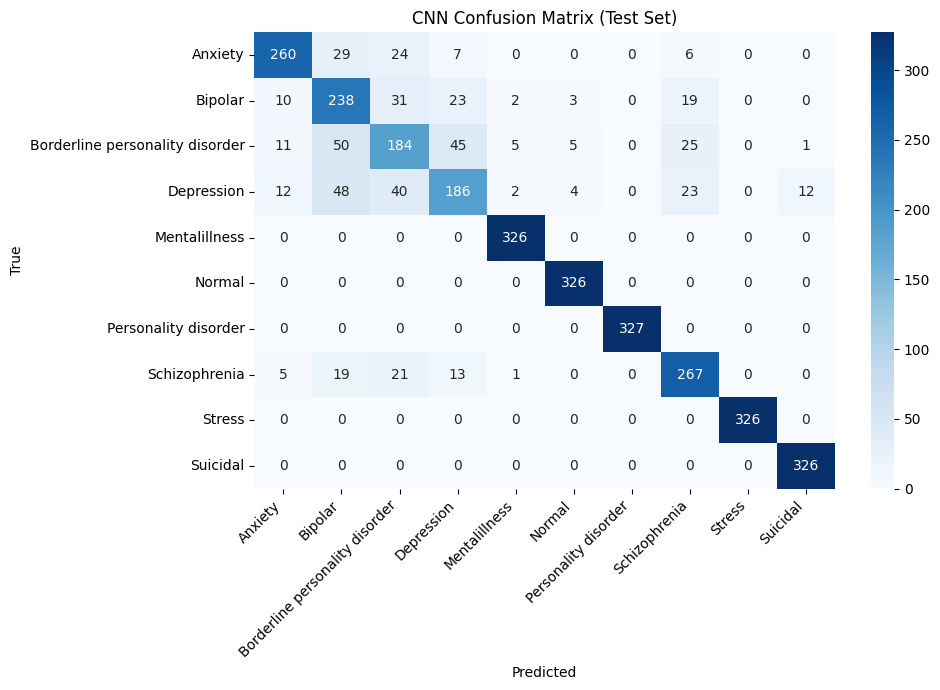

In [ ]:
# Predict with CNN model
cnn_test_preds = np.argmax(cnn_model.predict(X_test_reshaped), axis=1)

# Confusion matrix
cm_cnn = confusion_matrix(y_test, cnn_test_preds)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix (Test Set)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



816/816 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
816/816 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Training Metrics (Soft Voting Ensemble):
Accuracy:  93.49%
Precision: 93.39%
Recall:    93.49%
F1 Score:  93.41%
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Validation Metrics (Soft Voting Ensemble):
Accuracy:  87.92%
Precision: 87.41%
Recall:    87.92%
F1 Score:  87.54%
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Test Metrics (Soft Voting Ensemble):
Accuracy:  88.63%
Precision: 88.16%
Recall:    88.63%
F1 Score:  88.28%


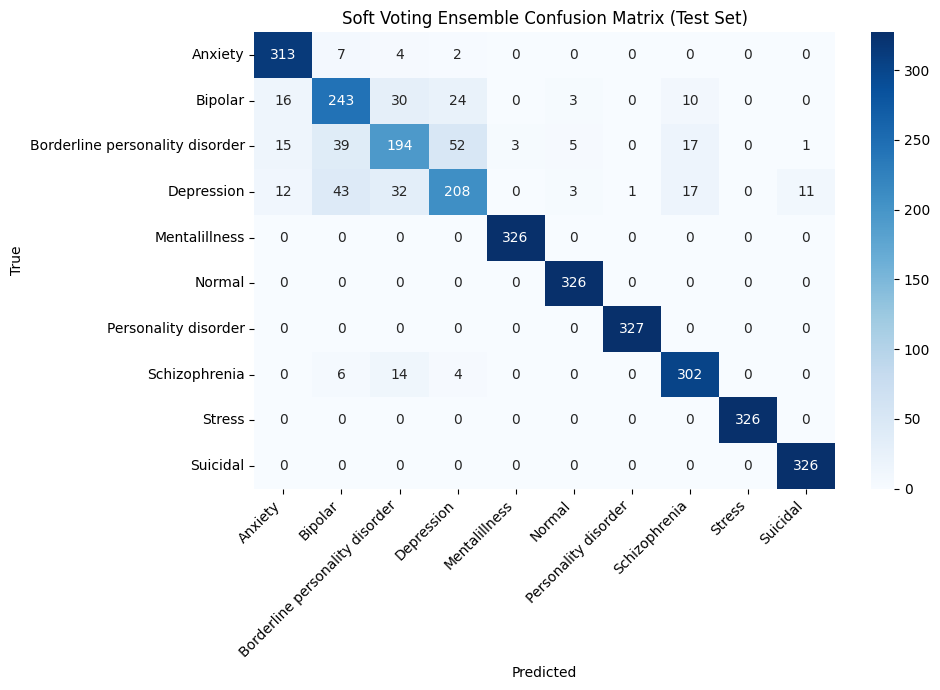

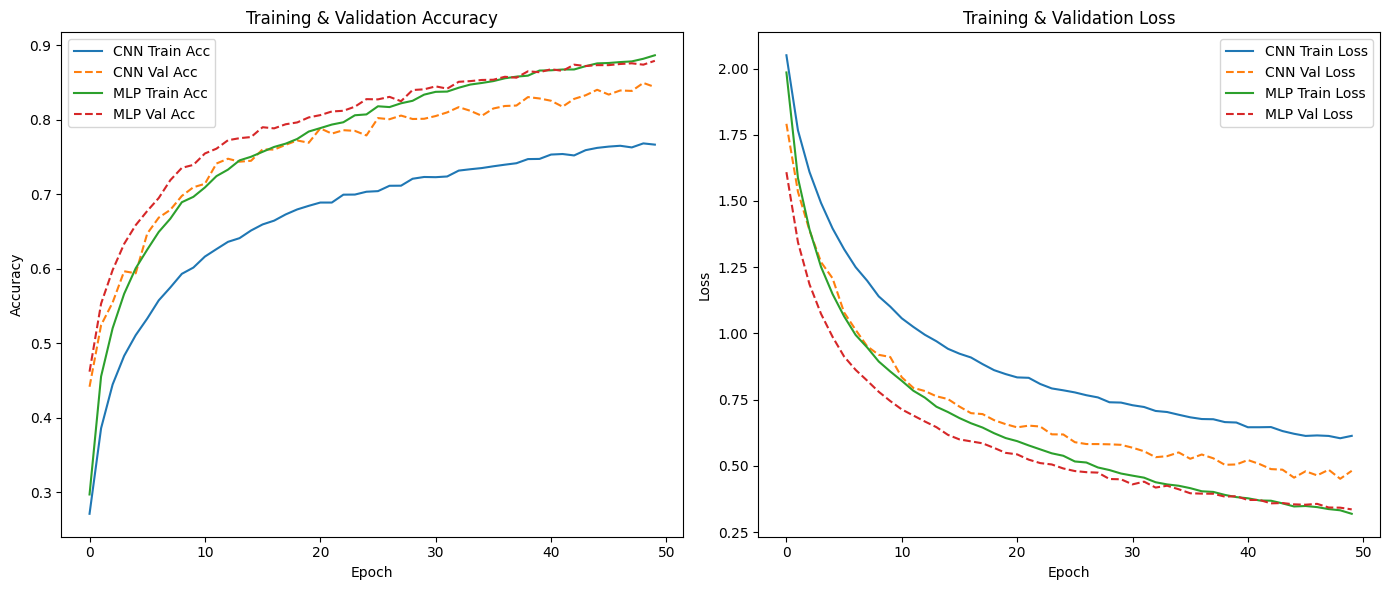

In [ ]:
# Soft Voting Ensemble Evaluation Function
def evaluate_soft_voting(mlp_model, cnn_model, X_mlp, X_cnn, y_true, dataset_name):
    mlp_probs = mlp_model.predict(X_mlp)
    cnn_probs = cnn_model.predict(X_cnn)
    ensemble_probs = (mlp_probs + cnn_probs) / 2.0
    ensemble_preds = np.argmax(ensemble_probs, axis=1)

    acc = accuracy_score(y_true, ensemble_preds)
    prec = precision_score(y_true, ensemble_preds, average='weighted', zero_division=0)
    rec = recall_score(y_true, ensemble_preds, average='weighted', zero_division=0)
    f1 = f1_score(y_true, ensemble_preds, average='weighted', zero_division=0)

    print(f"\n {dataset_name} Metrics (Soft Voting Ensemble):")
    print(f"Accuracy:  {acc * 100:.2f}%")
    print(f"Precision: {prec * 100:.2f}%")
    print(f"Recall:    {rec * 100:.2f}%")
    print(f"F1 Score:  {f1 * 100:.2f}%")

    return ensemble_preds

#  Evaluate Ensemble on Train, Val, and Test Sets
evaluate_soft_voting(mlp_model, cnn_model, X_train_embeddings, X_train_reshaped, y_train, "Training")
evaluate_soft_voting(mlp_model, cnn_model, X_val_embeddings, X_val_reshaped, y_val, "Validation")
ensemble_test_preds = evaluate_soft_voting(mlp_model, cnn_model, X_test_embeddings, X_test_reshaped, y_test, "Test")

#  Confusion Matrix for Test Set
cm = confusion_matrix(y_test, ensemble_test_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Soft Voting Ensemble Confusion Matrix (Test Set)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Combine both histories into one plot
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc', linestyle='-')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc', linestyle='--')
plt.plot(history_mlp.history['accuracy'], label='MLP Train Acc', linestyle='-')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Val Acc', linestyle='--')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN Train Loss', linestyle='-')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss', linestyle='--')
plt.plot(history_mlp.history['loss'], label='MLP Train Loss', linestyle='-')
plt.plot(history_mlp.history['val_loss'], label='MLP Val Loss', linestyle='--')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Fine-Tuned BERT

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_encoder.classes_)
)

# Tokenization function
def tokenize(texts, labels, max_length=128):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=max_length,
        return_tensors='tf'
    )
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    return dataset

# Tokenize datasets
train_dataset = tokenize(X_train, y_train).batch(32)
val_dataset = tokenize(X_val, y_val).batch(32)
test_dataset = tokenize(X_test, y_test).batch(32)

# Use a plain TF optimizer (avoid legacy, avoid keras.src)
optimizer = tf.optimizers.Adam(learning_rate=2e-5)




All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile the model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
836/836 [==============================] - 737s 824ms/step - loss: 0.9499 - accuracy: 0.6935 - val_loss: 0.3973 - val_accuracy: 0.8713
Epoch 2/10
836/836 [==============================] - 686s 820ms/step - loss: 0.3175 - accuracy: 0.9008 - val_loss: 0.2630 - val_accuracy: 0.9192
Epoch 3/10
836/836 [==============================] - 686s 820ms/step - loss: 0.1688 - accuracy: 0.9480 - val_loss: 0.2579 - val_accuracy: 0.9222
Epoch 4/10
836/836 [==============================] - 686s 821ms/step - loss: 0.1063 - accuracy: 0.9678 - val_loss: 0.2178 - val_accuracy: 0.9461
Epoch 5/10
836/836 [==============================] - 698s 835ms/step - loss: 0.0660 - accuracy: 0.9802 - val_loss: 0.2533 - val_accuracy: 0.9407
Epoch 6/10
836/836 [==============================] - 686s 821ms/step - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.2634 - val_accuracy: 0.9422
Epoch 7/10
836/836 [==============================] - 686s 820ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.2820 -

105/105 [==============================] - 34s 294ms/step

Test Classification Report:
                                 precision    recall  f1-score   support

                        Anxiety       0.98      1.00      0.99       334
                        Bipolar       0.84      0.92      0.88       334
Borderline personality disorder       0.84      0.73      0.78       334
                     Depression       0.86      0.76      0.81       335
                  Mentalillness       0.98      1.00      0.99       334
                         Normal       0.99      1.00      0.99       334
           Personality disorder       1.00      1.00      1.00       334
                  Schizophrenia       0.90      0.98      0.94       334
                         Stress       0.99      1.00      0.99       334
                       Suicidal       0.99      1.00      0.99       334

                       accuracy                           0.94      3341
                      macro avg    

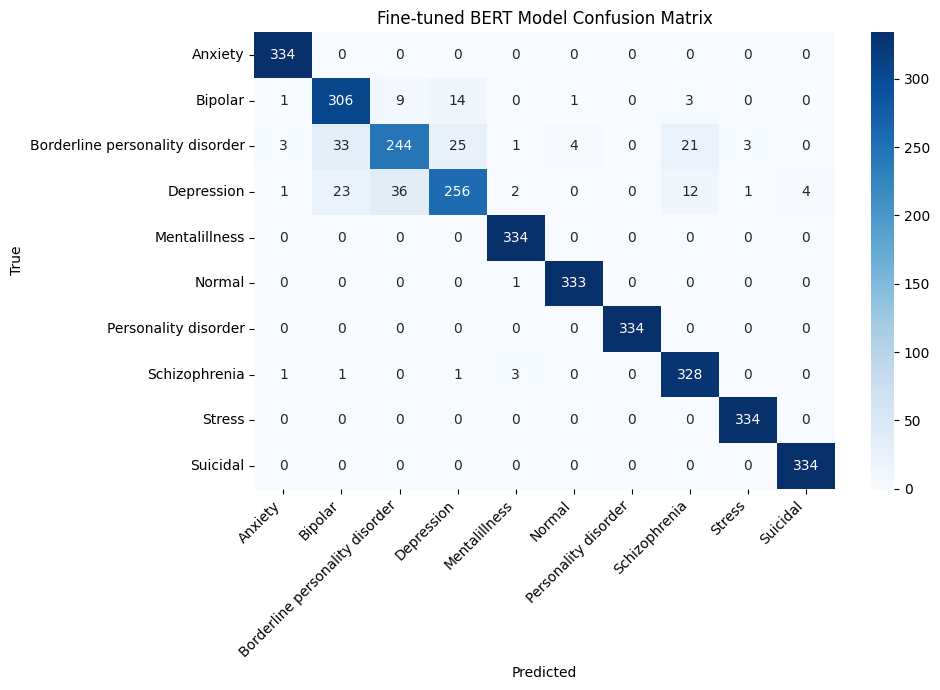


Fine-tuned BERT Model Metrics:
Accuracy:  93.89%
Precision: 93.76%
Recall:    93.89%
F1 Score:  93.72%


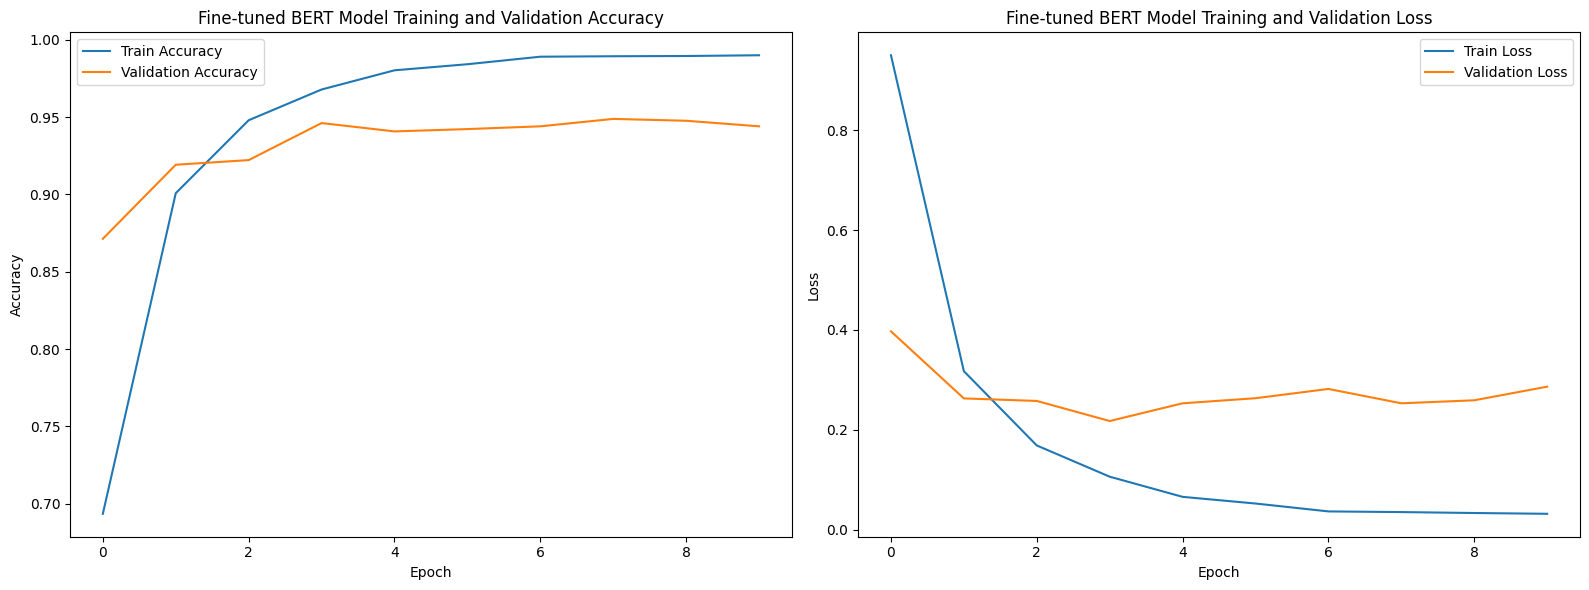

In [ ]:
def get_predictions(model, dataset):
    probs = model.predict(dataset).logits
    return np.argmax(probs, axis=1)

y_test_pred = get_predictions(model, test_dataset)

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Fine-tuned BERT Model Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, average='weighted')
rec = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nFine-tuned BERT Model Metrics:")
print(f"Accuracy:  {acc * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall:    {rec * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")


history_df = pd.DataFrame(history.history)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title("Fine-tuned BERT Model Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title("Fine-tuned BERT Model Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def evaluate_model_tfbert(model, dataset, true_labels, dataset_name="Set"):
    # Get predictions
    preds = model.predict(dataset)
    pred_labels = np.argmax(preds.logits, axis=1)

    # Accuracy
    acc = accuracy_score(true_labels, pred_labels)
    print(f"\n{dataset_name} Accuracy: {acc * 100:.2f}%")

    # Classification report
    print(f"\n{dataset_name} Classification Report:\n")
    print(classification_report(true_labels, pred_labels, target_names=label_encoder.classes_))


In [ ]:
# Evaluate on all datasets
evaluate_model_tfbert(model, train_dataset, y_train, "Training")
evaluate_model_tfbert(model, val_dataset, y_val, "Validation")
evaluate_model_tfbert(model, test_dataset, y_test, "Test")


836/836 [==============================] - 230s 275ms/step

✅ Training Accuracy: 99.72%

🔍 Training Classification Report:

                                 precision    recall  f1-score   support

                        Anxiety       1.00      1.00      1.00      2673
                        Bipolar       1.00      0.99      1.00      2673
Borderline personality disorder       1.00      1.00      1.00      2673
                     Depression       1.00      0.99      1.00      2672
                  Mentalillness       0.99      1.00      0.99      2673
                         Normal       1.00      1.00      1.00      2673
           Personality disorder       1.00      1.00      1.00      2672
                  Schizophrenia       0.99      1.00      0.99      2673
                         Stress       1.00      1.00      1.00      2673
                       Suicidal       1.00      1.00      1.00      2673

                       accuracy                           1.00     2672

#SAVE MODEL

In [ ]:
# Save the fine-tuned TensorFlow BERT model
model.save_pretrained("/content/drive/MyDrive/saved_mental_status_bert_tf")

# Save the tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/saved_mental_status_bert_tf")

# Save the label encoder
import pickle
with open("/content/drive/MyDrive/label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer
import pickle

# Load model
model = TFBertForSequenceClassification.from_pretrained("saved_mental_status_bert_tf")

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("saved_mental_status_bert_tf")

# Load label encoder
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)


Some layers from the model checkpoint at saved_mental_status_bert_tf were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at saved_mental_status_bert_tf.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


#COMPARISON OF THE GRAPH

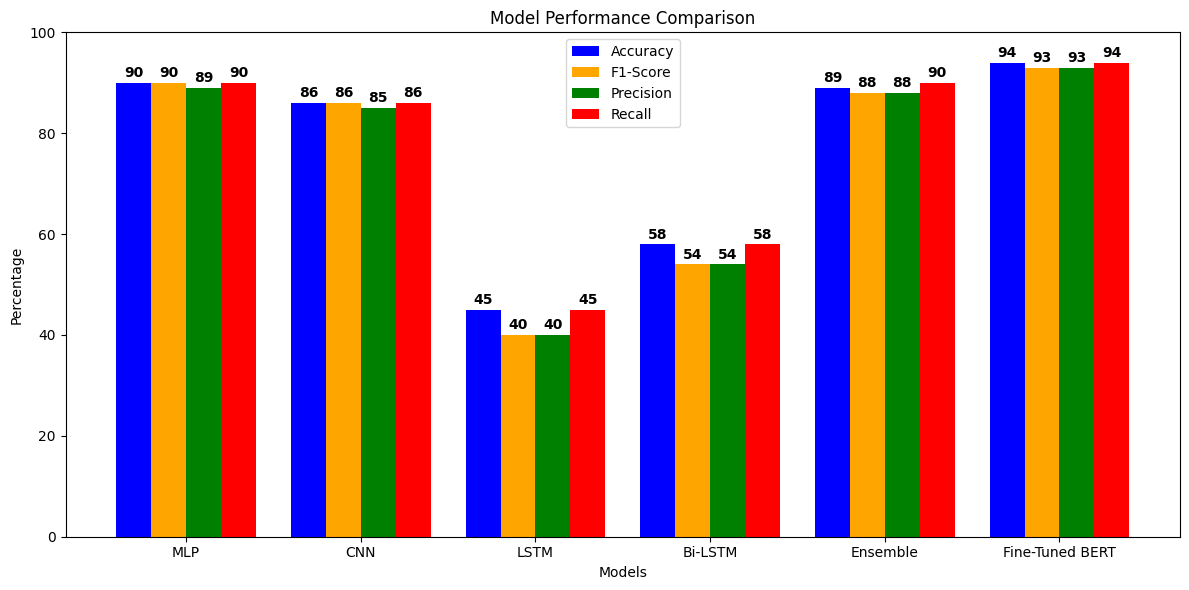

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Values in percentage (no decimals)
models = ['MLP', 'CNN', 'LSTM', 'Bi-LSTM', 'Ensemble', 'Fine-Tuned BERT']
accuracy = [90, 86, 45, 58,  89, 94]
f1_score = [90, 86, 40, 54,  88, 93]
precision = [89, 85, 40, 54,  88, 93]
recall = [90, 86, 45, 58,  90, 94]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='blue')
bars2 = ax.bar(x - 0.5*width, f1_score, width, label='F1-Score', color='orange')
bars3 = ax.bar(x + 0.5*width, precision, width, label='Precision', color='green')
bars4 = ax.bar(x + 1.5*width, recall, width, label='Recall', color='red')

# Add labels above bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{int(round(yval))}', ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Percentage')
ax.set_xlabel('Models')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


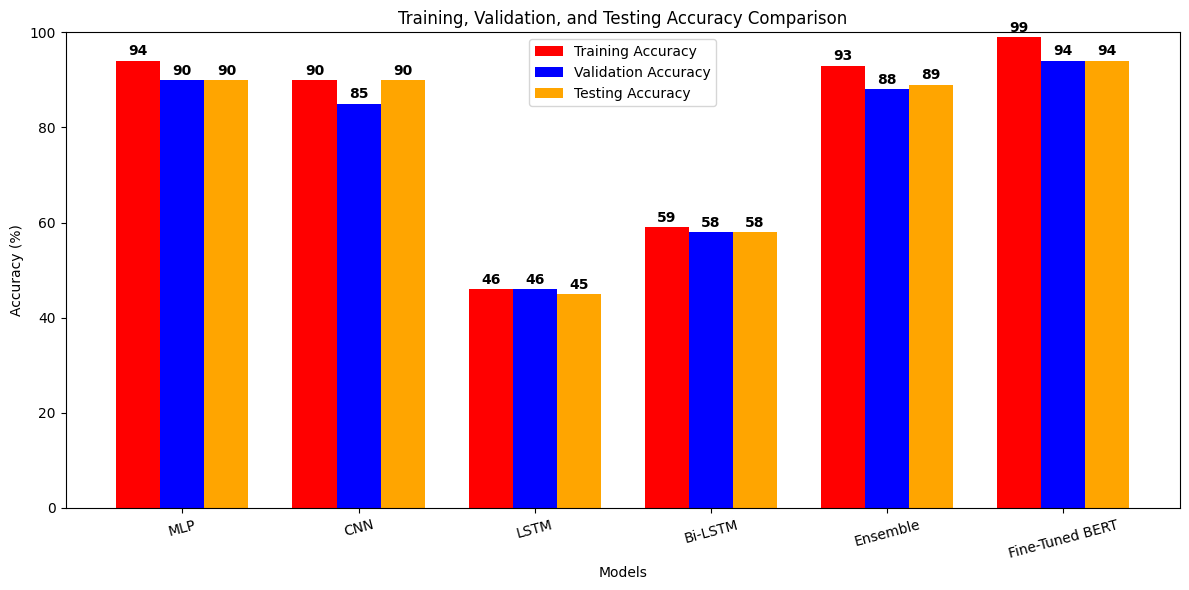

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (you should replace these with your actual values)
models = ['MLP', 'CNN', 'LSTM', 'Bi-LSTM', 'Ensemble','Fine-Tuned BERT']

# Accuracy values as percentages
train_acc = [94, 90, 46, 59,  93, 99]
val_acc =   [90, 85, 46, 58,  88, 94]
test_acc =  [90, 90, 45, 58,  89, 94]

x = np.arange(len(models))
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Bar positions
bars1 = ax.bar(x - width, train_acc, width, label='Training Accuracy', color='red')
bars2 = ax.bar(x, val_acc, width, label='Validation Accuracy', color='blue')
bars3 = ax.bar(x + width, test_acc, width, label='Testing Accuracy', color='orange')

# Add labels on top of bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{int(round(yval))}', ha='center', va='bottom', fontweight='bold')

# Labels and formatting
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Models')
ax.set_title('Training, Validation, and Testing Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
